## Import libraries  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Import Data

In [3]:
df = pd.read_csv(r"datasets/wuzzuf_dataset.csv",index_col=False)
df.drop(columns="Unnamed: 0", inplace=True)

## Data Overview

In [4]:
df.head(10)

,job title,company,location,country,job_type_list,workplace,career_level,url
0,Senior Full-Stack Developer,Caveo Financial Services,6th of October Giza,Egypt,Full Time,On-site,Experienced,https://wuzzuf.net/jobs/p/ug9hgmFzVhjx-Senior-...
1,Detergent Raw Material Sales Manager - Alexandria,Madar Group,Alexandria,Egypt,Full Time,On-site,Manager,https://wuzzuf.net/jobs/p/5Pp4LN1PxB0L-Deterge...
2,Accountant,Confidential,Nasr City Cairo,Egypt,Full Time,On-site,Experienced,https://wuzzuf.net/jobs/p/0et2bj7R1NVd-Account...
3,Access Control Management Officer,Confidential,Cairo,Egypt,Full Time,On-site,Entry Level,https://wuzzuf.net/jobs/p/gBhZrHUEasM6-Access-...
4,Accountant,Crafted,Sheikh Zayed Giza,Egypt,Full Time,On-site,Experienced,https://wuzzuf.net/jobs/p/yiFip9ZnqkXx-Account...
5,Art Director,El Ezaby Pharmacy,Cairo,Egypt,Full Time,On-site,Senior Management,https://wuzzuf.net/jobs/p/WNXmEOjWm4pP-Art-Dir...
6,Procurement Specialist,Crafted,Sheikh Zayed Giza,Egypt,Full Time,On-site,Experienced,https://wuzzuf.net/jobs/p/2rspF1f9szZE-Procure...
7,Production Engineer for TEXTILE FURNITURE,El Bokhary Tex,10th of Ramadan City Sharqia,Egypt,Full Time,On-site,Entry Level,https://wuzzuf.net/jobs/p/aETWqtj91AtI-Product...
8,Sales Coordinator - logistics,Eshratex,Alexandria,Egypt,Full Time,On-site,Experienced,https://wuzzuf.net/jobs/p/OU8SI410Ze9J-Sales-C...
9,Electrical Engineer,Eshratex,Bourj Alarab Alexandria,Egypt,Full Time,On-site,Experienced,https://wuzzuf.net/jobs/p/CZL3YGGDyJUS-Electri...


In [5]:
df.dtypes

job title        object
company          object
location         object
country          object
job_type_list    object
workplace        object
career_level     object
url              object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   job title      600 non-null    object
 1   company        600 non-null    object
 2   location       600 non-null    object
 3   country        600 non-null    object
 4   job_type_list  600 non-null    object
 5   workplace      600 non-null    object
 6   career_level   600 non-null    object
 7   url            600 non-null    object
dtypes: object(8)
memory usage: 37.6+ KB


In [7]:
df.describe(include="object")

,job title,company,location,country,job_type_list,workplace,career_level,url
count,600,600,600,600,600,600,600,600
unique,542,358,83,9,4,3,5,600
top,Accountant,Confidential,Cairo,Egypt,Full Time,On-site,Experienced,https://wuzzuf.net/jobs/p/ug9hgmFzVhjx-Senior-...
freq,7,45,109,580,581,491,377,1


## Data Quality

In [8]:
df.isnull().sum()

job title        0
company          0
location         0
country          0
job_type_list    0
workplace        0
career_level     0
url              0
dtype: int64

## Top 5 Job Titles  

<b>Insights :</b>  
- The top 5 job titles are in high demand, showing the main areas where companies are hiring.
- These roles reflect important sectors in the job market.
- The Accountant role stands out with the highest demand.   
  
<b>Recommendations:</b> 
- For Job Seekers: Focus on applying for these popular roles if your skills and interests match them.

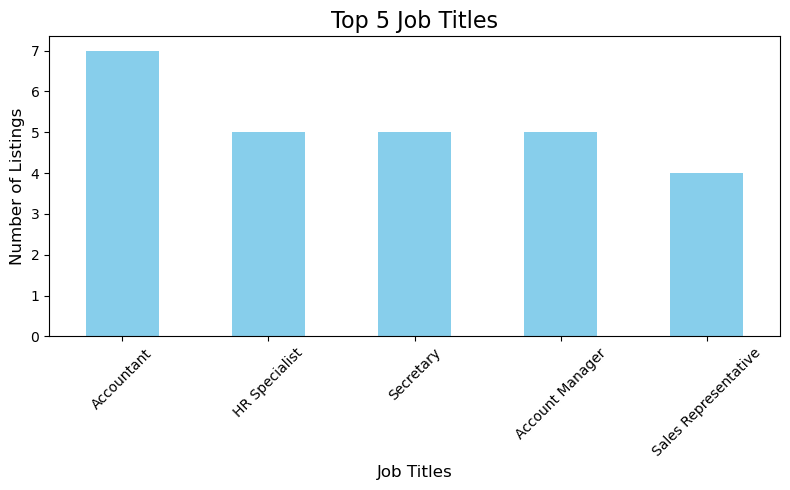

In [9]:
data=df['job title'].value_counts().head(5)
plt.figure(figsize=(8, 5))
data.plot(kind='bar', color='skyblue')
plt.title('Top 5 Job Titles', fontsize=16)
plt.xlabel('Job Titles', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

## Top 5 Companies Hiring  
  



<b>Insights :</b>  
- The top 5 companies have the most listings, reflecting their active employment.   
- These companies might provide more opportunities but may also have competitive hiring processes.    
  
<b>Recommendations:</b>  
- Job seekers can target these top companies for job opportunities.

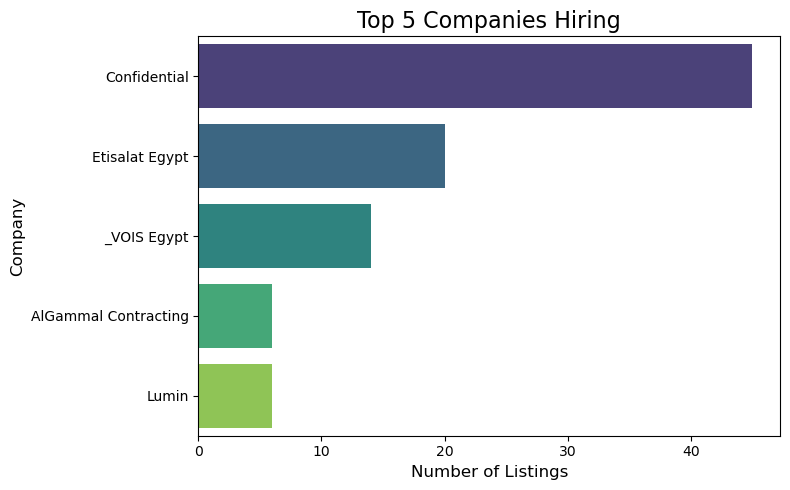

In [10]:
data=df['company'].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=data.values, hue=data.index,y=data.index ,palette='viridis')
plt.title('Top 5 Companies Hiring', fontsize=16)
plt.xlabel('Number of Listings', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.tight_layout()
plt.show()

## Job Type Distribution

<b>Insights :</b>  
-  The distribution of job types (e.g., full-time, part-time, freelance) showcases the work market's structure and flexibility.  
- Most jobs are Full-time, it means companies are looking for long-term employees.

<b>Recommendations:</b> 
- Employers can align their hiring strategies to match popular job types, while job seekers should target roles that suit their preferred working styles.

In [11]:
data = df['job_type_list'].value_counts()
fig = px.pie(
    names=data.index,
    values=data.values,
    title='Job Type Distribution'
)
fig.show()

## Workplace Distribution

<b>Insights :</b>  
- This indicates that most companies prefer employees to work from their offices. 


<b>Recommendations:</b>  
- If you're open to On-site jobs, you'll have a larger pool of opportunities to choose from.


In [12]:
data = df['workplace'].value_counts(normalize=True) * 100
fig = px.bar(
    x=data.index,
    y=data.values,
    title='Workplace Distribution',
    labels={'x': 'Workplace Type', 'y': 'Percentage'},
    color=data.index,
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.show()

## Top 5 Locations for Jobs

<b>Recommendations:</b>  
- For Job Seekers:

    - Focus your job search on Cairo if you're seeking more opportunities, especially in districts like Maadi, New Cairo, and Nasr City.


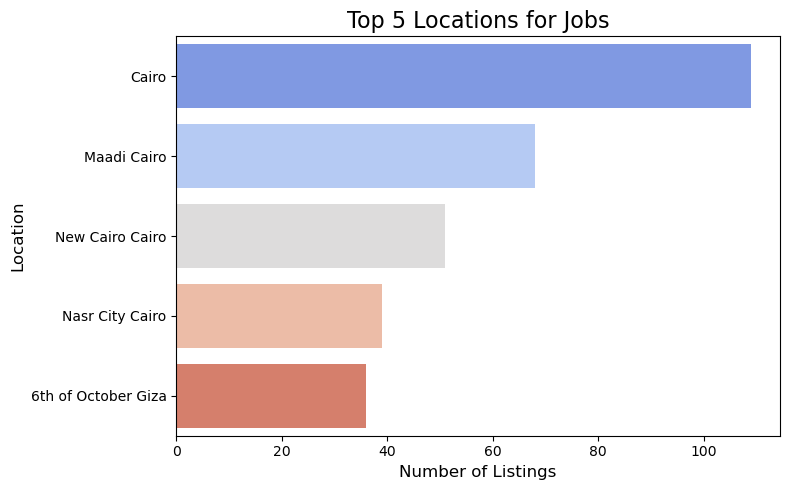

In [13]:
data = df['location'].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=data.values, y=data.index,hue=data.index, palette='coolwarm')
plt.title('Top 5 Locations for Jobs', fontsize=16)
plt.xlabel('Number of Listings', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.tight_layout()
plt.show()

## Career Level Distribution

<b>Insights :</b>  
- The majority of job listings target Experienced professionals, indicating a strong demand for individuals with proven expertise. 
- Entry-level roles have a noticeable presence, suggesting opportunities for fresh graduates or early-career professionals.    
- A higher spread of a particular career level can guide job seekers to fit their applications to match demand.

<b>Recommendations:</b>   
- For Job Seekers:

    - Experienced professionals have the most opportunities; those with relevant experience should capitalize on this trend.

    - Fresh graduates should focus on entry-level openings and internships to build experience.

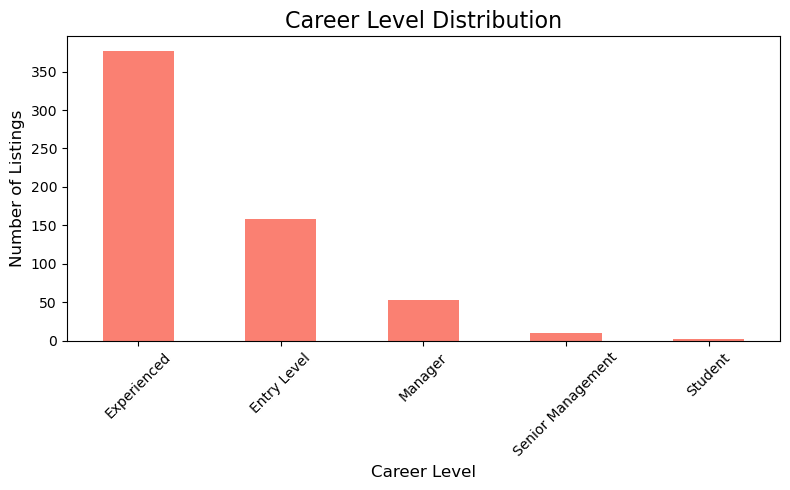

In [14]:
data = df['career_level'].value_counts()
plt.figure(figsize=(8, 5))
data.plot(kind='bar', color='salmon')
plt.title('Career Level Distribution', fontsize=16)
plt.xlabel('Career Level', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

## Most Frequent Job Types per Country (Top 5 Countries)

<b>Insights :</b>  
- The majority of jobs are Full-Time positions in Egypt.  
- This reflects a preference in the Egyptian job market for stable, long-term roles in Egypt.  
- Other countries show a more diverse distribution of job types (such as part-time or remote work). However, data for some countries might be limited compared to Egypt.

<b>Recommendations:</b> 
- For Job Seekers If you're looking for opportunities outside Egypt, focus on the common job types in those countries (e.g., remote or part-time work).

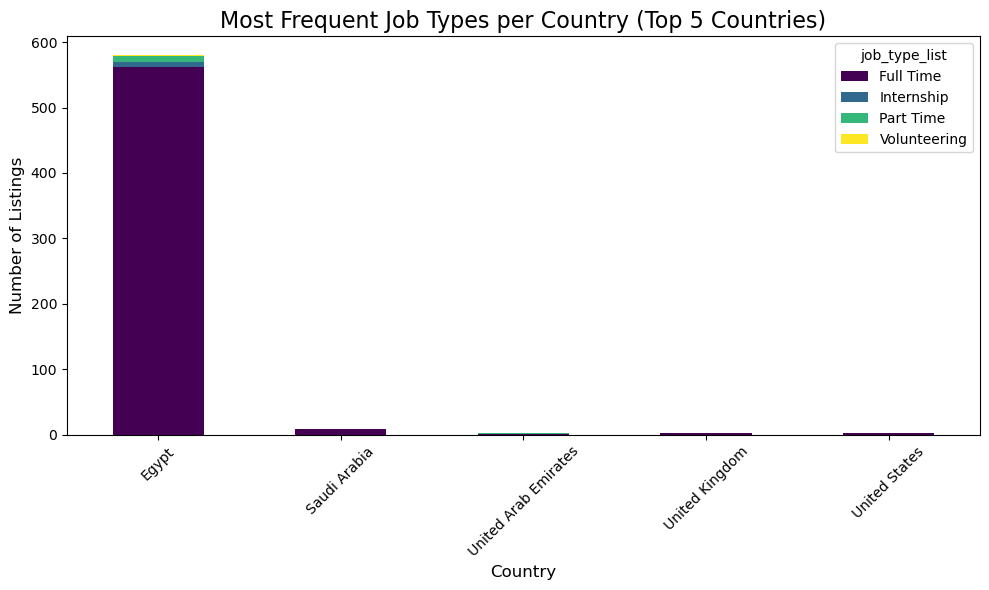

In [ ]:
top_countries = df['country'].value_counts().head(5).index
filtered_data = df[df['country'].isin(top_countries)]
job_types_per_country = filtered_data.groupby(['country', 'job_type_list']).size().unstack(fill_value=0)

job_types_per_country.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Most Frequent Job Types per Country (Top 5 Countries)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()